In [1]:
import mne
import numpy as np
from pprint import pprint
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Replace with the path to your .fif file you want to explore
fif_file = 'data/openfmri/train/sub-05/run_01.fif'

# Read the raw data with preloading
raw = mne.io.read_raw_fif(fif_file, preload=True)
print(raw)

Opening raw data file data/openfmri/train/sub-05/run_01.fif...


/tmp/ipykernel_8233/2576768564.py:5: RuntimeWarning: This filename (data/openfmri/train/sub-05/run_01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


    Range : 141900 ... 681999 =    129.000 ...   619.999 secs
Ready.
Reading 0 ... 540099  =      0.000 ...   490.999 secs...
<Raw | run_01.fif, 404 x 540100 (491.0 s), ~1.63 GB, data loaded>


# Previewing the data

#### Channel information

In [3]:
# number of channels
n_channels = raw.info['nchan']
print(f'Total number of channels: {n_channels}')

# channel types 
channel_types = raw.get_channel_types()
type_counts = Counter(channel_types)
print(f'Channel types: {type_counts}')

# channel names
channel_names = raw.ch_names
print(f'Channel names ({len(channel_names)}): {channel_names}')

Total number of channels: 404
Channel types: Counter({'grad': 204, 'mag': 102, 'eeg': 74, 'misc': 12, 'chpi': 9, 'stim': 3})
Channel names (404): ['MEG0113', 'MEG0112', 'MEG0111', 'MEG0122', 'MEG0123', 'MEG0121', 'MEG0132', 'MEG0133', 'MEG0131', 'MEG0143', 'MEG0142', 'MEG0141', 'MEG0213', 'MEG0212', 'MEG0211', 'MEG0222', 'MEG0223', 'MEG0221', 'MEG0232', 'MEG0233', 'MEG0231', 'MEG0243', 'MEG0242', 'MEG0241', 'MEG0313', 'MEG0312', 'MEG0311', 'MEG0322', 'MEG0323', 'MEG0321', 'MEG0333', 'MEG0332', 'MEG0331', 'MEG0343', 'MEG0342', 'MEG0341', 'MEG0413', 'MEG0412', 'MEG0411', 'MEG0422', 'MEG0423', 'MEG0421', 'MEG0432', 'MEG0433', 'MEG0431', 'MEG0443', 'MEG0442', 'MEG0441', 'MEG0513', 'MEG0512', 'MEG0511', 'MEG0523', 'MEG0522', 'MEG0521', 'MEG0532', 'MEG0533', 'MEG0531', 'MEG0542', 'MEG0543', 'MEG0541', 'MEG0613', 'MEG0612', 'MEG0611', 'MEG0622', 'MEG0623', 'MEG0621', 'MEG0633', 'MEG0632', 'MEG0631', 'MEG0642', 'MEG0643', 'MEG0641', 'MEG0713', 'MEG0712', 'MEG0711', 'MEG0723', 'MEG0722', 'MEG07

#### Sampling information
  

In [4]:
# number of samples
n_samples = raw.n_times
print(f'Number of samples (frames): {n_samples}')

# sampling frequency        
sfreq = raw.info['sfreq']
print(f'Sampling frequency: {sfreq} Hz')

# duration of recording 
duration = n_samples / sfreq
print(f'Duration of recording: {duration} seconds')

Number of samples (frames): 540100
Sampling frequency: 1100.0 Hz
Duration of recording: 491.0 seconds


## Accessign data format

#### Data info
- Data shape
- Data type

In [5]:
data = raw.get_data()

# Data shape
print(f'Data shape (n_channels x n_times): {data.shape}')

# Data type
print(f'Data type: {data.dtype}')

Data shape (n_channels x n_times): (404, 540100)
Data type: float64


#### Chanell acess

In [6]:
# Channel Indices
eeg_indices = mne.pick_types(raw.info, meg=False, eeg=True)
meg_indices = mne.pick_types(raw.info, meg=True, eeg=False)
# print(f'EEG channel indices: {eeg_indices}')
print(f'Number of EEG channels: {len(eeg_indices)}')
print(f'Number of MEG channels: {len(eeg_indices)}')

# EEG and MEG Data
eeg_data = data[eeg_indices, :]
meg_data = data[meg_indices, :]
# print(f'MEG channel indices: {meg_indices}')
print(f'Number of MEG channels: {len(meg_indices)}')
print(f'MEG data shape: {meg_data.shape}')

# Optional: Separate MEG magnetometers and gradiometers
mag_indices = mne.pick_types(raw.info, meg='mag')
grad_indices = mne.pick_types(raw.info, meg='grad')
print(f'Number of magnetometer channels: {len(mag_indices)}')
print(f'Number of gradiometer channels: {len(grad_indices)}')

Number of EEG channels: 74
Number of MEG channels: 74
Number of MEG channels: 306
MEG data shape: (306, 540100)
Number of magnetometer channels: 102
Number of gradiometer channels: 204


In [7]:
# Get indices of EEG channels
eeg_indices = mne.pick_types(raw.info, meg=False, eeg=True)
print(f'EEG channel indices: {eeg_indices}')
print(f'Number of EEG channels: {len(eeg_indices)}')

# Get indices of MEG channels
meg_indices = mne.pick_types(raw.info, meg=True, eeg=False)
print(f'MEG channel indices: {meg_indices}')
print(f'Number of MEG channels: {len(meg_indices)}')

# Optional: Separate MEG magnetometers and gradiometers
mag_indices = mne.pick_types(raw.info, meg='mag')
grad_indices = mne.pick_types(raw.info, meg='grad')
print(f'Number of magnetometer channels: {len(mag_indices)}')
print(f'Number of gradiometer channels: {len(grad_indices)}')

EEG channel indices: [306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379]
Number of EEG channels: 74
MEG channel indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 

In [8]:
channel_info = pd.DataFrame({
    'Name': raw.ch_names,
    'Type': raw.get_channel_types(),
    'Unit': [raw._orig_units.get(ch, 'NA') for ch in raw.ch_names],
    'Sampling Frequency': [sfreq] * n_channels
})
print(channel_info.head())

      Name  Type Unit  Sampling Frequency
0  MEG0113  grad   NA              1100.0
1  MEG0112  grad   NA              1100.0
2  MEG0111   mag   NA              1100.0
3  MEG0122  grad   NA              1100.0
4  MEG0123  grad   NA              1100.0


# Plotting

#### Plotting EEG electrodes in 2D

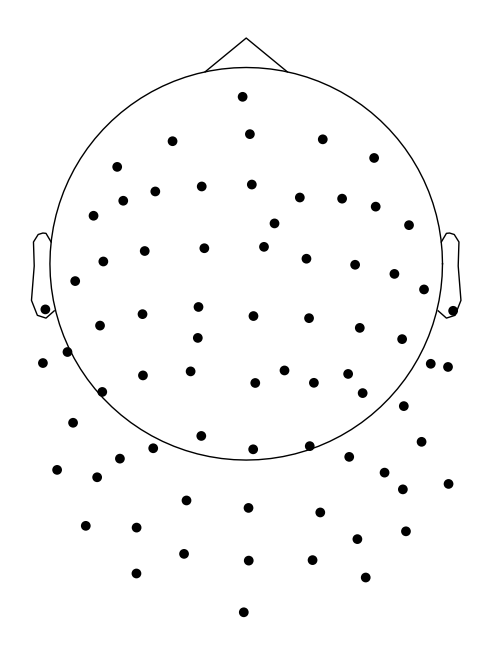

In [9]:
%matplotlib inline

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    raw.plot_sensors(kind='topomap', ch_type='eeg')

#### Plotting EEG electrodes in 3D

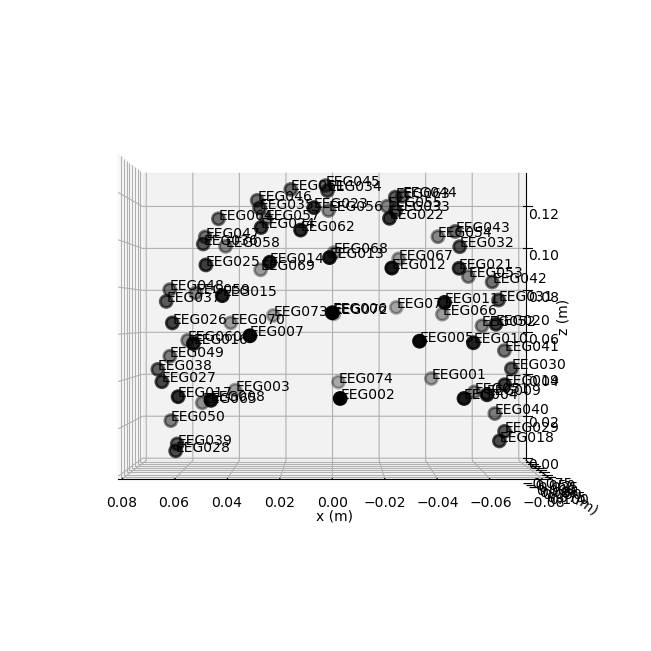

In [10]:
%matplotlib inline

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    raw.plot_sensors(kind='3d', ch_type='eeg', show_names=True)

#### Plotting MEG electrodes in 2D

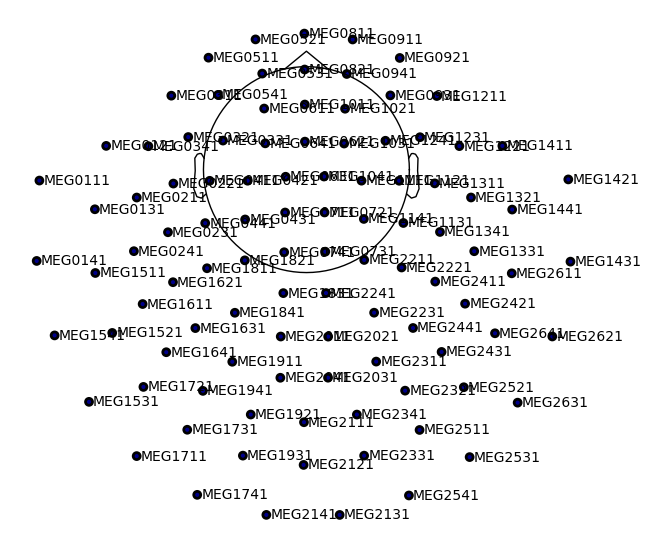

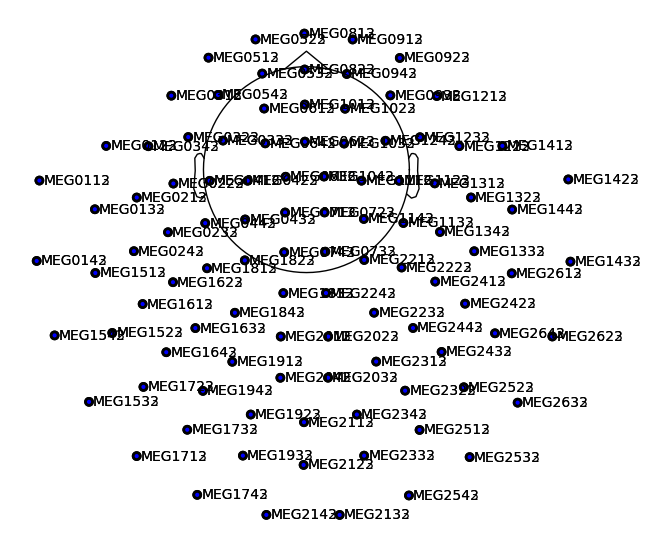

In [11]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    raw.plot_sensors(kind='topomap', ch_type='mag', show_names=True)  # Only MEG sensors MAG
    raw.plot_sensors(kind='topomap', ch_type='grad', show_names=True)  # Only MEG sensors


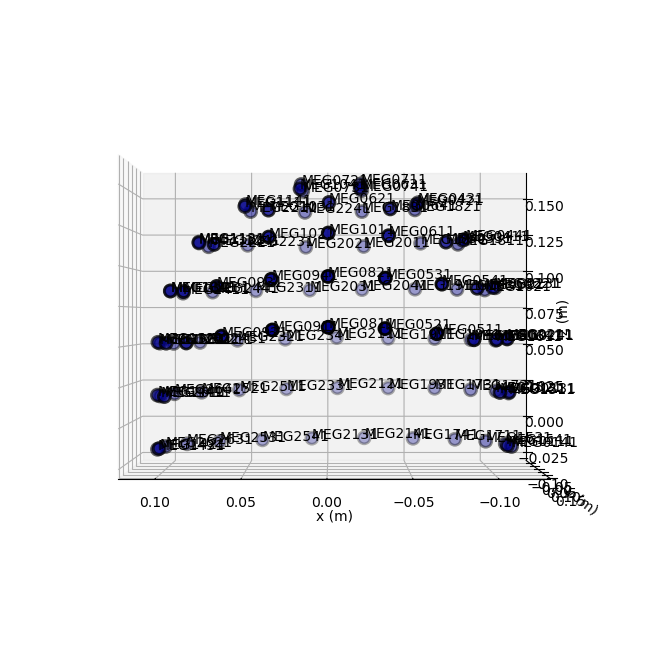

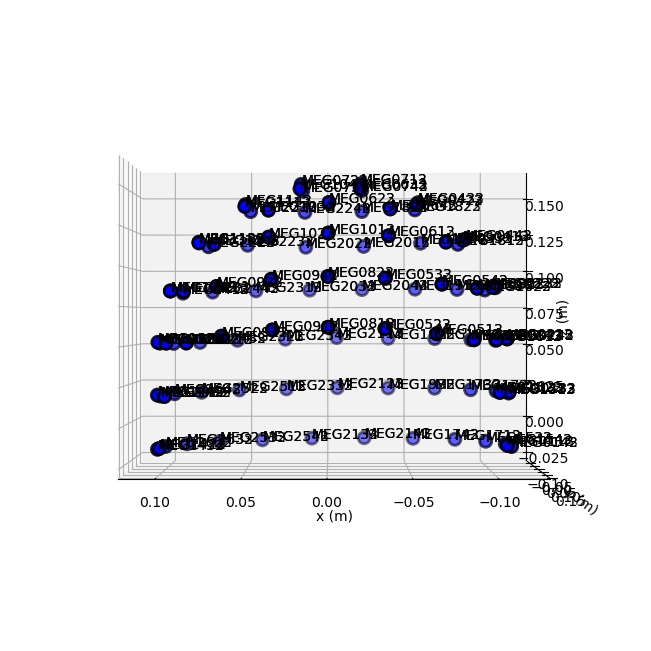

In [12]:
# Plotting magnetometers in 3D
%matplotlib inline
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    raw.plot_sensors(kind='3d', ch_type='mag', show_names=True)

# Plotting gradiometers in 3D
%matplotlib inline
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    raw.plot_sensors(kind='3d', ch_type='grad', show_names=True)

#### Plotting both EEG & MEG electrodes together & Calculating closest neighbours

- Plotting all electrodes

In [21]:
# Full code
import plotly.graph_objects as go
import numpy as np
import mne

# Get sensor positions
pos = raw._get_channel_positions() * 1000 # Convert to mm

# Create separate traces for EEG and MEG sensors
eeg_idx = mne.pick_types(raw.info, eeg=True, meg=False)
meg_idx = mne.pick_types(raw.info, meg=True, eeg=False)

# Create the 3D scatter plot
fig = go.Figure()

# Add EEG sensors
eeg_pos = pos[eeg_idx]
fig.add_trace(go.Scatter3d(
    x=eeg_pos[:, 0], y=eeg_pos[:, 1], z=eeg_pos[:, 2],
    mode='markers+text',
    marker=dict(size=8, color='blue'),
    text=[raw.ch_names[i] for i in eeg_idx],
    name='EEG'
))

# Add MEG sensors
meg_pos = pos[meg_idx]
fig.add_trace(go.Scatter3d(
    x=meg_pos[:, 0], y=meg_pos[:, 1], z=meg_pos[:, 2],
    mode='markers+text',
    marker=dict(size=8, color='red'),
    text=[raw.ch_names[i] for i in meg_idx],
    name='MEG'
))

# Find closest MEG electrode for each EEG electrode and plot line
closest_distances = []
for i, eeg_electrode in enumerate(eeg_pos):
    # Calculate distances to all MEG electrodes
    distances = np.sqrt(np.sum((meg_pos - eeg_electrode)**2, axis=1))
    
    # Find the closest MEG electrode
    closest_meg_idx = np.argmin(distances)
    closest_meg_electrode = meg_pos[closest_meg_idx]
    min_distance = distances[closest_meg_idx]
    closest_distances.append(min_distance)
    
    # Create line coordinates
    x_line = [eeg_electrode[0], closest_meg_electrode[0]]
    y_line = [eeg_electrode[1], closest_meg_electrode[1]]
    z_line = [eeg_electrode[2], closest_meg_electrode[2]]
    
    # Add line trace
    fig.add_trace(go.Scatter3d(
        x=x_line, y=y_line, z=z_line,
        mode='lines',
        line=dict(color='green', width=2),  # Made lines slightly thicker
        opacity=0.5,  # Made lines more visible
        showlegend=False,
        hoverinfo='text',
        text=f'Distance: {min_distance:.2f} mm'
    ))

# Update layout
fig.update_layout(
    title='EEG and MEG Sensor Positions with Shortest Distance Lines',
    scene=dict(
        xaxis_title='X (mm)',
        yaxis_title='Y (mm)',
        zaxis_title='Z (mm)',
        aspectmode='data'     

    ),
    width=800,
    height=800
)

# Save the plot as an HTML file
fig.write_html("sensor_positions_closest_distances.html")
print("Plot saved as 'sensor_positions_closest_distances.html'. You can open it in your web browser.")

# Print statistics about the closest distances
print(f"\nClosest Distance Statistics (in mm):")
print(f"Minimum distance: {min(closest_distances):.2f}")
print(f"Maximum distance: {max(closest_distances):.2f}")
print(f"Average distance: {np.mean(closest_distances):.2f}")
print(f"Standard deviation: {np.std(closest_distances):.2f}")

Plot saved as 'sensor_positions_closest_distances.html'. You can open it in your web browser.

Closest Distance Statistics (in mm):
Minimum distance: 4.19
Maximum distance: 46.23
Average distance: 21.05
Standard deviation: 9.29


- Plotting only the closely connected EEG and MEG electrode pairs (those that are in the bottom 25% of distance interquartile range)

In [18]:
import plotly.graph_objects as go
import numpy as np
import mne

# Get sensor positions and convert from meters to millimeters
pos = raw._get_channel_positions() * 1000  # Convert positions to mm

# Create separate indices for EEG and MEG sensors
eeg_idx = mne.pick_types(raw.info, eeg=True, meg=False)
meg_idx = mne.pick_types(raw.info, meg=True, eeg=False)

# EEG sensor positions and names
eeg_pos_full = pos[eeg_idx]
eeg_names_full = [raw.ch_names[i] for i in eeg_idx]

# MEG sensor positions and names
meg_pos_full = pos[meg_idx]
meg_names_full = [raw.ch_names[i] for i in meg_idx]

# Variables to store distances and indices
closest_distances = []
closest_meg_indices = []

# Compute closest MEG electrode for each EEG electrode
for i, eeg_electrode in enumerate(eeg_pos_full):
    distances = np.linalg.norm(meg_pos_full - eeg_electrode, axis=1)
    closest_meg_idx = np.argmin(distances)
    min_distance = distances[closest_meg_idx]
    
    closest_distances.append(min_distance)
    closest_meg_indices.append(closest_meg_idx)

# Convert lists to numpy arrays for easier indexing
closest_distances = np.array(closest_distances)
closest_meg_indices = np.array(closest_meg_indices)

# Calculate quartiles
q1 = np.percentile(closest_distances, 25)
q3 = np.percentile(closest_distances, 75)
iqr = q3 - q1

# Find indices of EEG electrodes in the bottom 25%
bottom25_indices = np.where(closest_distances <= q1)[0]

# Filter EEG electrodes to only those in bottom 25%
eeg_pos = eeg_pos_full[bottom25_indices]
eeg_names = [eeg_names_full[i] for i in bottom25_indices]

# Get corresponding MEG indices and positions
closest_meg_indices_bottom25 = closest_meg_indices[bottom25_indices]
used_meg_indices = np.unique(closest_meg_indices_bottom25)
used_meg_pos = meg_pos_full[used_meg_indices]
used_meg_names = [meg_names_full[i] for i in used_meg_indices]

# Create the 3D scatter plot
fig = go.Figure()

# Add EEG sensors (Bottom 25%) to the plot
fig.add_trace(go.Scatter3d(
    x=eeg_pos[:, 0],
    y=eeg_pos[:, 1],
    z=eeg_pos[:, 2],
    mode='markers+text',
    marker=dict(size=5, color='blue'),
    text=eeg_names,
    name='EEG (Bottom 25%)'
))

# Add MEG sensors corresponding to the Bottom 25% EEG electrodes
fig.add_trace(go.Scatter3d(
    x=used_meg_pos[:, 0],
    y=used_meg_pos[:, 1],
    z=used_meg_pos[:, 2],
    mode='markers+text',
    marker=dict(size=5, color='red'),
    text=used_meg_names,
    name='MEG (Corresponding)'
))

# Add lines between EEG electrodes and their closest MEG electrodes
for i, eeg_electrode in enumerate(eeg_pos):
    closest_meg_idx = closest_meg_indices_bottom25[i]
    closest_meg_electrode = meg_pos_full[closest_meg_idx]
    min_distance = np.linalg.norm(closest_meg_electrode - eeg_electrode)
    
    x_line = [eeg_electrode[0], closest_meg_electrode[0]]
    y_line = [eeg_electrode[1], closest_meg_electrode[1]]
    z_line = [eeg_electrode[2], closest_meg_electrode[2]]
    
    # Add line trace
    fig.add_trace(go.Scatter3d(
        x=x_line,
        y=y_line,
        z=z_line,
        mode='lines',
        line=dict(color='green', width=2),
        opacity=0.8,
        showlegend=False,
        hoverinfo='text',
        text=f'Distance: {min_distance:.2f} mm'
    ))

# Update plot layout
fig.update_layout(
    title='EEG and MEG Sensor Positions (Bottom 25% Distances)',
    scene=dict(
        xaxis_title='X (mm)',
        yaxis_title='Y (mm)',
        zaxis_title='Z (mm)',
        aspectmode='data'  # Ensures equal scaling
    ),
    width=800,
    height=800
)

# Save the plot as an HTML file
fig.write_html("sensor_positions_bottom25.html")
print("Plot saved as 'sensor_positions_bottom25.html'. You can open it in your web browser.")

# Print distance statistics for bottom 25%
bottom25_distances = closest_distances[bottom25_indices]
print(f"\nBottom 25% Closest Distance Statistics (in mm):")
print(f"Minimum distance: {bottom25_distances.min():.2f}")
print(f"Maximum distance: {bottom25_distances.max():.2f}")
print(f"Average distance: {bottom25_distances.mean():.2f}")
print(f"Standard deviation: {bottom25_distances.std():.2f}")
print(f"Number of EEG electrodes in Bottom 25%: {len(bottom25_indices)}")
print(f"Number of MEG electrodes used: {len(used_meg_indices)}")

Plot saved as 'sensor_positions_bottom25.html'. You can open it in your web browser.

Bottom 25% Closest Distance Statistics (in mm):
Minimum distance: 4.19
Maximum distance: 15.28
Average distance: 10.57
Standard deviation: 3.42
Number of EEG electrodes in Bottom 25%: 19
Number of MEG electrodes used: 17


#### Plotting EEG spectogramm

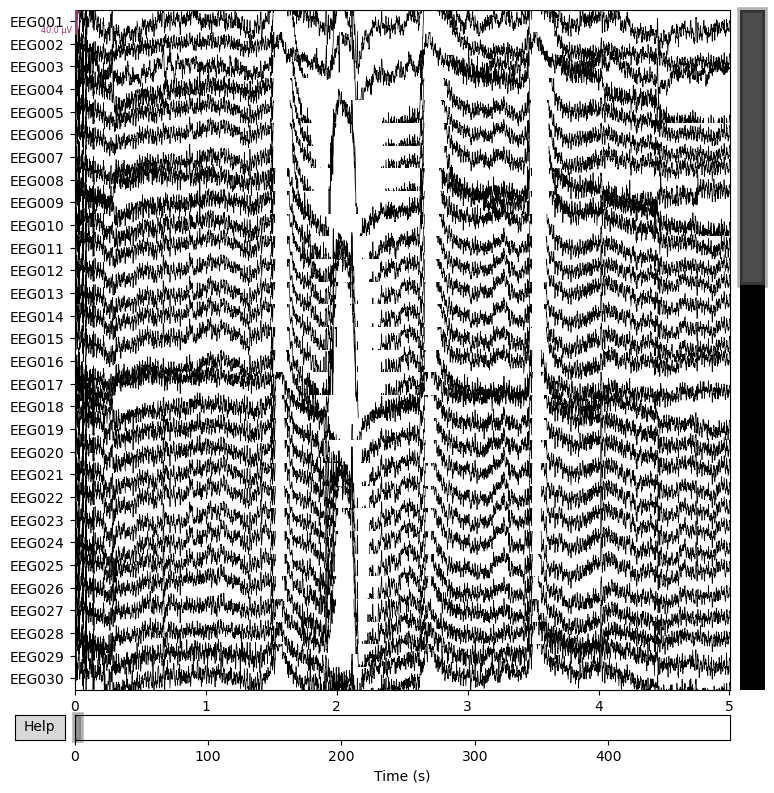

In [62]:
# Plot EEG data
eeg_indices = mne.pick_types(raw.info, meg=False, eeg=True)
raw.plot(picks=eeg_indices, duration=5, n_channels=30, title='EEG Data')
plt.show()

#### Plotting MEG spectogramm

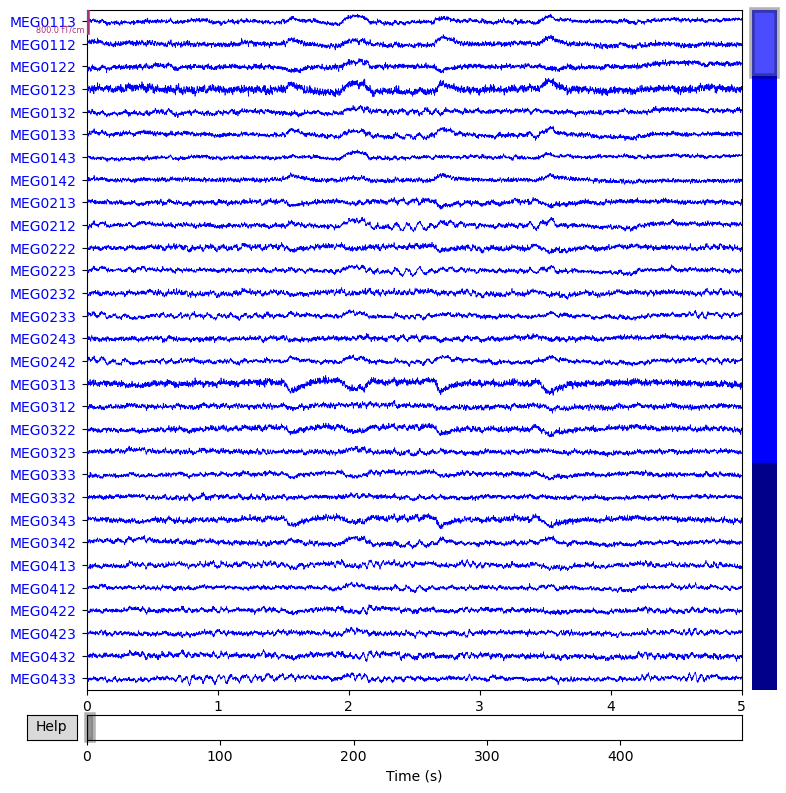

In [63]:
# Pick MEG channels
meg_indices = mne.pick_types(raw.info, meg=True, eeg=False)

# Plot MEG data
raw.plot(picks=meg_indices, duration=5, n_channels=30, title='MEG Data')
plt.show()


Number of EEG channels: 74
Number of MEG channels: 306
EEG data shape: (74, 540100)
MEG data shape: (306, 540100)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.862 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_1437935/264725723.py:19: RuntimeWarning: Only 10 head digitization points of the specified kind ("extra",), fitting may be inaccurate
  raw.plot_psd(picks=eeg_indices, fmax=100, average=True, spatial_colors=False, ax=ax)
/tmp/ipykernel_1437935/264725723.py:19: RuntimeWarning: (X, Y) fit (-1.6, 40.5) more than 20 mm from head frame origin
  raw.plot_psd(picks=eeg_indices, fmax=100, average=True, spatial_colors=False, ax=ax)


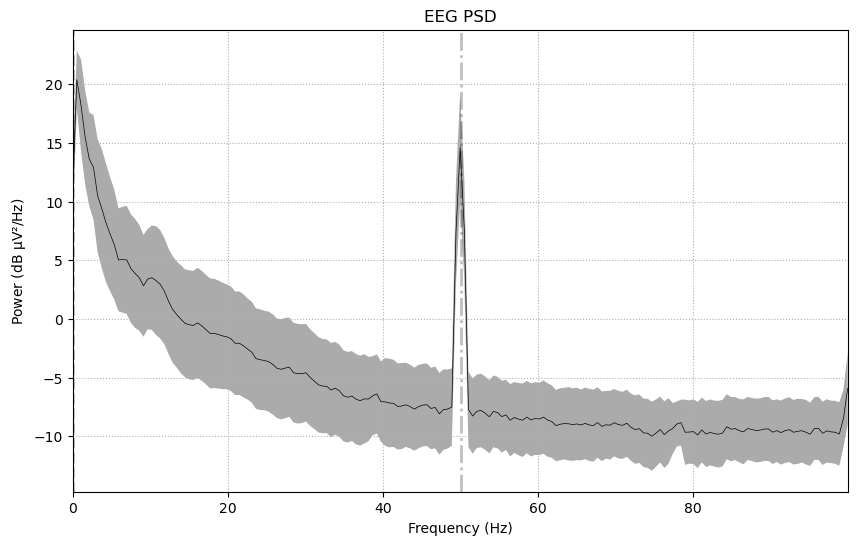

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.862 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


/tmp/ipykernel_1437935/264725723.py:29: RuntimeWarning: Only 10 head digitization points of the specified kind ("extra",), fitting may be inaccurate
  raw.plot_psd(picks=mag_indices, fmax=100, average=True, spatial_colors=False, ax=ax1)
/tmp/ipykernel_1437935/264725723.py:29: RuntimeWarning: (X, Y) fit (-1.6, 40.5) more than 20 mm from head frame origin
  raw.plot_psd(picks=mag_indices, fmax=100, average=True, spatial_colors=False, ax=ax1)


Effective window size : 1.862 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_1437935/264725723.py:32: RuntimeWarning: Only 10 head digitization points of the specified kind ("extra",), fitting may be inaccurate
  raw.plot_psd(picks=grad_indices, fmax=100, average=True, spatial_colors=False, ax=ax2)
/tmp/ipykernel_1437935/264725723.py:32: RuntimeWarning: (X, Y) fit (-1.6, 40.5) more than 20 mm from head frame origin
  raw.plot_psd(picks=grad_indices, fmax=100, average=True, spatial_colors=False, ax=ax2)


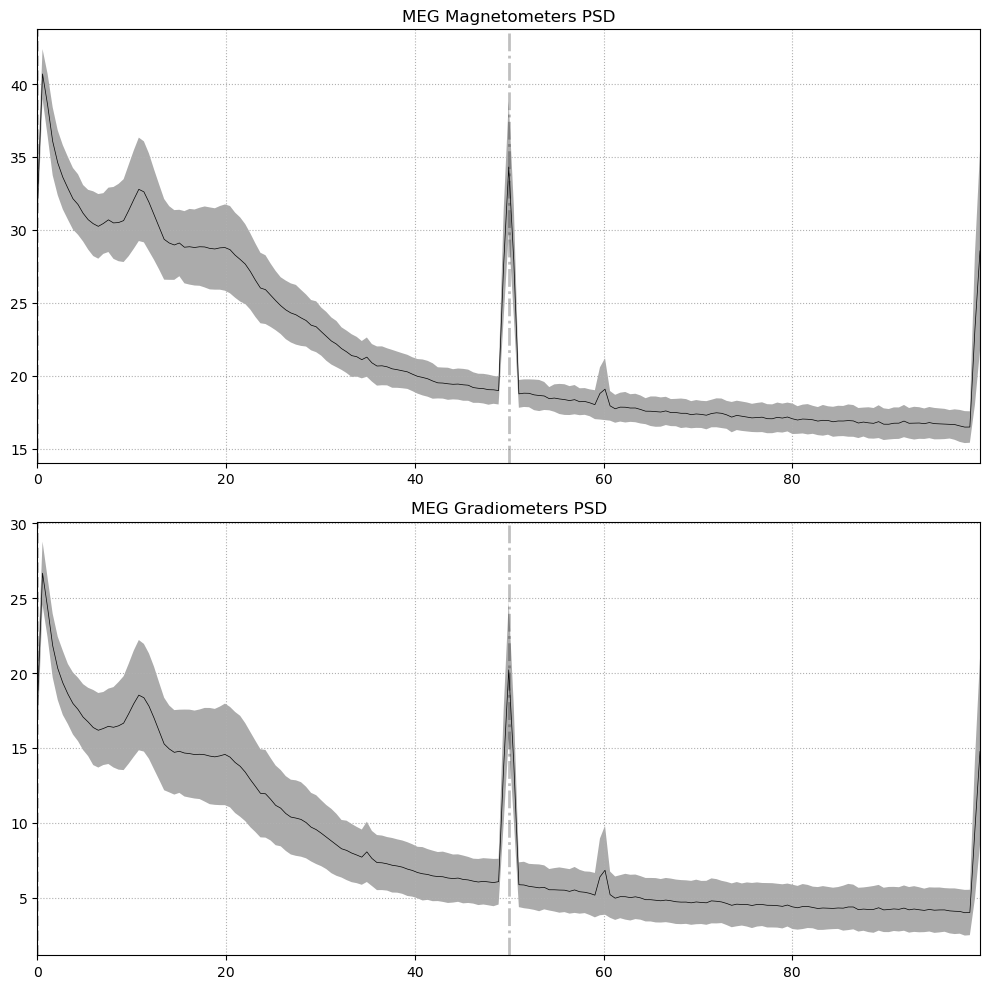

294 events found on stim channel STI101
Event IDs: [   5    6    7   13   14   15   17   18   19  256  261  262  263  269
  270  271  273  274  275 4096 4101 4102 4103 4109 4110 4111 4113 4114
 4115]
Found 294 events.
[[167268      0     17]
 [168037     17   4113]
 [170613      0     17]
 [171401     17   4113]
 [174104      0     13]
 [174999     13   4109]
 [177632      0     14]
 [178449     14    270]
 [181087      0     17]
 [181857     17   4113]
 [184597      0      5]
 [185271      5   4101]
 [188033      0      6]
 [188689      6   4102]
 [191598      0     13]
 [192510     13   4109]
 [195016      0     14]
 [195843     14   4110]
 [198323      0     19]
 [199104     19   4115]
 [201704      0     13]
 [202596     13   4109]
 [205214      0     19]
 [206021     19   4115]
 [208797      0      5]
 [210034      0   4096]
 [212344      0      5]
 [213092      5   4101]
 [215946      0     19]
 [216774     19   4115]
 [219419      0     13]
 [220109     13    269]
 [223039      

In [66]:

# Channel Indices
eeg_indices = mne.pick_types(raw.info, meg=False, eeg=True)
meg_indices = mne.pick_types(raw.info, meg=True, eeg=False)
print(f'Number of EEG channels: {len(eeg_indices)}')
print(f'Number of MEG channels: {len(meg_indices)}')

# EEG and MEG Data
eeg_data = data[eeg_indices, :]
meg_data = data[meg_indices, :]
print(f'EEG data shape: {eeg_data.shape}')
print(f'MEG data shape: {meg_data.shape}')

# Units Conversion
eeg_data_uv = eeg_data * 1e6  # Convert EEG data to µV
meg_data_ft = meg_data * 1e15  # Convert MEG data to fT (magnetometers)

# Power Spectral Density for EEG
fig, ax = plt.subplots(figsize=(10, 6))
raw.plot_psd(picks=eeg_indices, fmax=100, average=True, spatial_colors=False, ax=ax)
ax.set_title('EEG PSD')
plt.show()

# Power Spectral Density for MEG
# Separate plots for magnetometers and gradiometers
mag_indices = mne.pick_types(raw.info, meg='mag')
grad_indices = mne.pick_types(raw.info, meg='grad')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
raw.plot_psd(picks=mag_indices, fmax=100, average=True, spatial_colors=False, ax=ax1)
ax1.set_title('MEG Magnetometers PSD')

raw.plot_psd(picks=grad_indices, fmax=100, average=True, spatial_colors=False, ax=ax2)
ax2.set_title('MEG Gradiometers PSD')
plt.tight_layout()
plt.show()


# Events and Annotations
events = mne.find_events(raw, stim_channel='STI101')
print(f'Found {len(events)} events.')
print(events)
print('Annotations:')
print(raw.annotations)

# Measurement Info
print('Measurement Info:')
pprint(raw.info)